# Lead Score Case Study Assignment 

# Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 
X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

# Goals of the Case Study

   Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
   
   There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

In [672]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #Data Visualization Libraries
import seaborn as sns #Data Visualization Libraries

import warnings
warnings.filterwarnings('ignore') # Filtering Warnings

# 1. Data loading and cleaning

### Importing data

In [673]:
# loading the dataset using pandas
Lead_score = pd.read_csv("C:\\Users\\sravy\\Documents\\Lead_Score_Case_Study\\Lead+Scoring+Case+Study\\Lead Scoring Assignment\\Leads.csv")
Lead_score.head()   # Inspecting the data

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [674]:
# Checking the number of rows and columns in dataset using shape function
Lead_score.shape

(9240, 37)

In [675]:
Lead_score.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [676]:
#Checking the names of columns and their datatypes using info() function
Lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Data Cleaning

In [677]:
# converting all string values to lower case
Lead_score = Lead_score.applymap(lambda x:x.lower() if type(x) == str else x)

In [678]:
# Replacing select with nan values 
Lead_score = Lead_score.replace("select",np.nan)

In [679]:
# Checking for null values
Lead_score.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [680]:
# checking percentage of null values in each column
round((Lead_score.isnull().sum()/len(Lead_score)*100),2).sort_values(ascending= False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

#### There are many null values in some columns so lets delete columns with null values greater than 45% 

In [681]:
# Deleting null values greater than 45%
for i in Lead_score.columns:
     if((100*(Lead_score[i].isnull().sum()/len(Lead_score.index))) >= 45):
        Lead_score.drop(i, 1, inplace = True)

In [682]:
# checking percentage of null values in each column after dropping columns having null values greater than 45%
round((Lead_score.isnull().sum()/len(Lead_score)*100),2).sort_values(ascending= False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Prospect ID                                       0.00
Newspaper                                         0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Digital Ad

In [683]:
Lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,...,no,no,no,interested in other courses,no,no,NaN,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,...,no,no,no,ringing,no,no,NaN,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,...,no,no,no,will revert after reading the email,no,no,mumbai,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,...,no,no,no,ringing,no,no,mumbai,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.0,...,no,no,no,will revert after reading the email,no,no,mumbai,no,no,modified


In [684]:
# City and tags columns does not have any useful information and more than 35% columns are null values so we can drop them
Lead_score.drop(['Tags','City'], axis = 1, inplace = True)

In [685]:
# Filling the remaining columns with high null values with 'not provided' values
Lead_score['Specialization'] = Lead_score['Specialization'].fillna('not provided') 
Lead_score['What matters most to you in choosing a course'] = Lead_score['What matters most to you in choosing a course'].fillna('not provided')
Lead_score['What is your current occupation'] = Lead_score['What is your current occupation'].fillna('not provided')
Lead_score['Country'] = Lead_score['Country'].fillna('not provided')

In [686]:
# Checking for null values once again
round((Lead_score.isnull().sum()/len(Lead_score)*100),2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [687]:
Lead_score.shape

(9240, 28)

In [688]:
Lead_score[["Prospect ID","Lead Number"]].head()

,Prospect ID,Lead Number
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737
1,2a272436-5132-4136-86fa-dcc88c88f482,660728
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719
4,3256f628-e534-4826-9d63-4a8b88782852,660681


In [689]:
## Dropping prospects id  and Lead number as they are having only unique ID values.
Lead_score = Lead_score.drop(["Prospect ID","Lead Number"],1)
Lead_score.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,not provided,...,no,no,no,no,no,no,no,no,no,modified
1,api,organic search,no,no,0,5.0,674,2.5,email opened,india,...,no,no,no,no,no,no,no,no,no,email opened
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,...,no,no,no,no,no,no,no,no,yes,email opened
3,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,...,no,no,no,no,no,no,no,no,no,modified
4,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,...,no,no,no,no,no,no,no,no,no,modified


In [690]:
Lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        9240 

In [691]:
# Checking if there are columns with one unique values
Lead_score.nunique()

Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            39
Specialization                                     19
What is your current occupation                     7
What matters most to you in choosing a course       4
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement       

In [692]:
# Dropping unique value columns as they won't affect ananlysis
Lead_score.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis=1,inplace=True)

In [693]:
Lead_score.shape

(9240, 21)

In [694]:
Lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        9240 

In [695]:
Lead_score['Country'].value_counts()

india                   6492
not provided            2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
kuwait                     4
south africa               4
canada                     4
nigeria                    4
germany                    4
sweden                     3
philippines                2
uganda                     2
italy                      2
bangladesh                 2
netherlands                2
asia/pacific region        2
china                      2
belgium                    2
ghana                      2
kenya                      1
sri lanka                  1
tanzania                   1
malaysia                   1
liberia                    1
switzerland   

In [696]:
# Clubing all the values with less value counts with 'outside india' for ease of analysis
def slots(val):
    category = ""
    if val == "india":
        category = "india"
    elif val == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

Lead_score['Country'] = Lead_score.apply(lambda val:slots(val['Country']), axis = 1)
Lead_score['Country'].value_counts()

india            6492
not provided     2461
outside india     287
Name: Country, dtype: int64

In [697]:
Lead_score.shape

(9240, 21)

# 2. EDA
### Univaraiate analysis

In [698]:
### Analysing Categorical variables

In [699]:
Lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        9240 

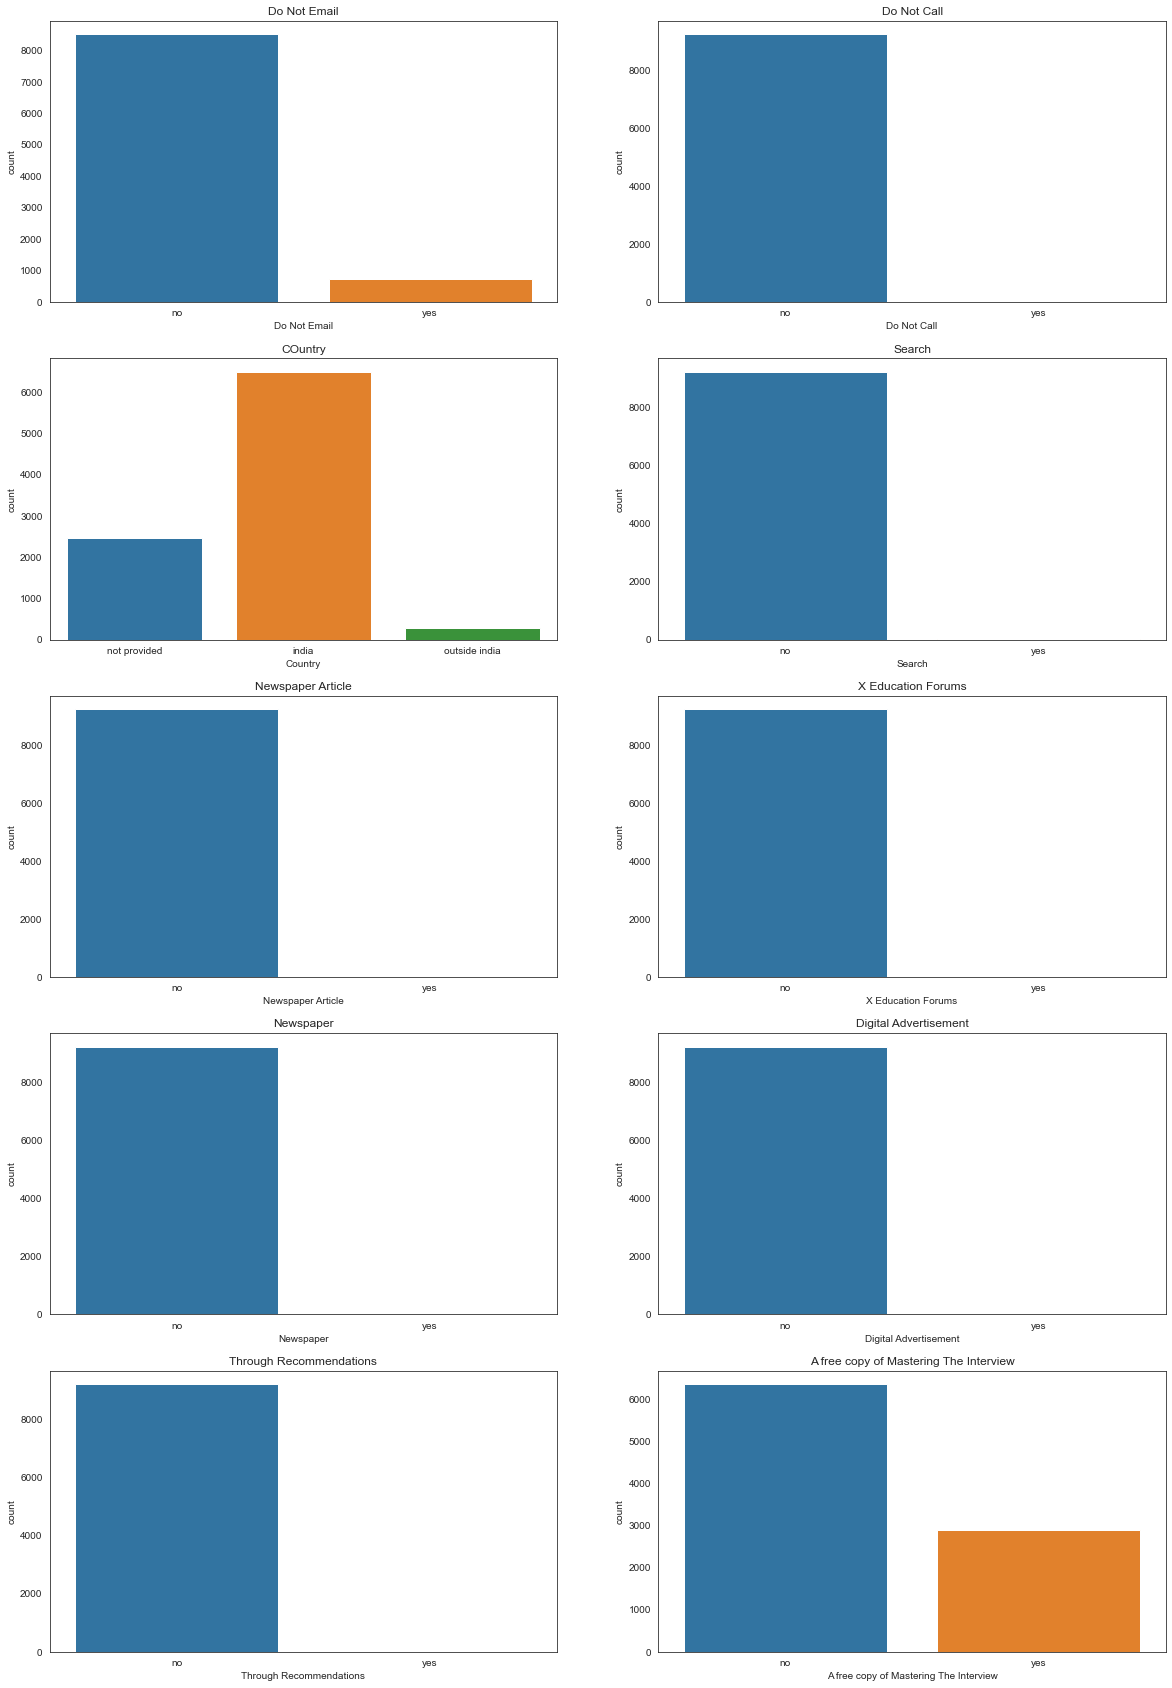

In [700]:
# Visualisation of categorical variables
plt.figure(figsize = (20,30))

plt.subplot(5,2,1)
sns.countplot(Lead_score['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(5,2,2)
sns.countplot(Lead_score['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(5,2,3)
sns.countplot(Lead_score['Country'])
plt.title('COuntry')

plt.subplot(5,2,4)
sns.countplot(Lead_score['Search'])
plt.title('Search')

plt.subplot(5,2,5)
sns.countplot(Lead_score['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(5,2,6)
sns.countplot(Lead_score['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(5,2,7)
sns.countplot(Lead_score['Newspaper'])
plt.title('Newspaper')

plt.subplot(5,2,8)
sns.countplot(Lead_score['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(5,2,9)
sns.countplot(Lead_score['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(5,2,10)
sns.countplot(Lead_score['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')


plt.show()


Insights:

    People in India are mainly this website.
    
    There are majority of no's to many of the columns.
    

Text(0.5, 1.0, 'Lead Origin')

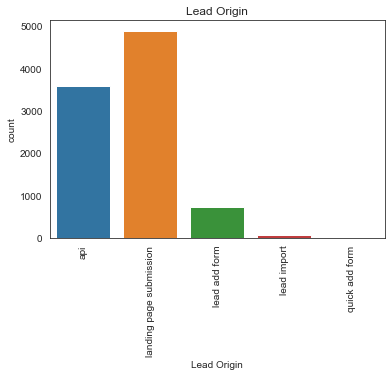

In [701]:
sns.countplot(Lead_score['Lead Origin']).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

There are many leads origin from landing page submission.

Text(0.5, 1.0, 'Lead Source')

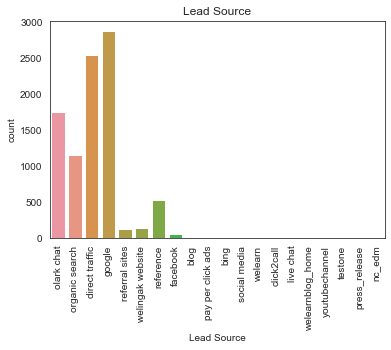

In [702]:
sns.countplot(Lead_score['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')

Google is the main source of the leads to visit the website.

Text(0.5, 1.0, 'What is your current occupation')

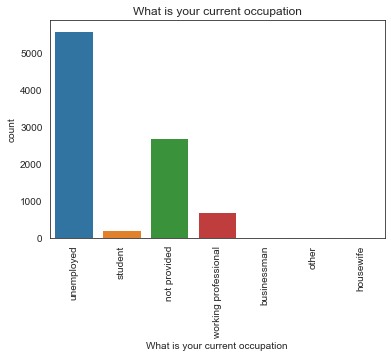

In [703]:
sns.countplot(Lead_score['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')

There are more unemployed people who visits the site and who are willing to join.

Text(0.5, 1.0, 'Specialization')

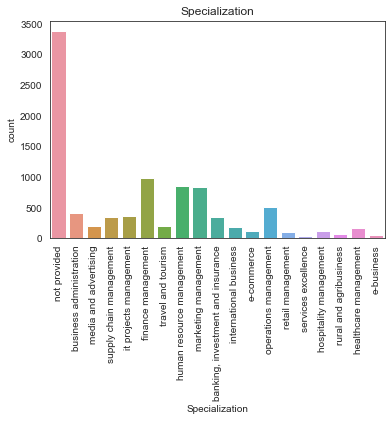

In [704]:
sns.countplot(Lead_score['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')


Many people donot want to mention their specialization 

Text(0.5, 1.0, 'What matters most to you in choosing a course')

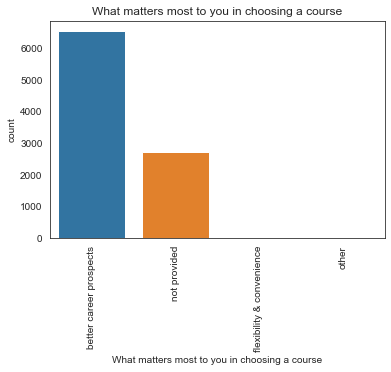

In [705]:
sns.countplot(Lead_score['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')


People are willing to join this education website for better career prospects

Text(0.5, 1.0, 'Last Activity')

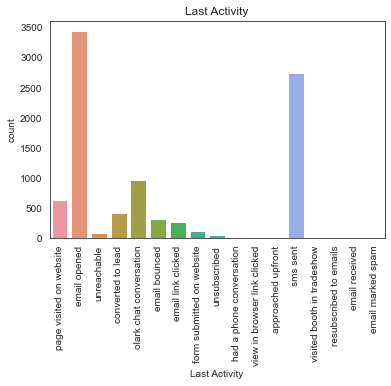

In [706]:
sns.countplot(Lead_score['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

Last activity is tracked by the email opened by the lead

In [707]:
# Visualising the numerical variables

Lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        9240 

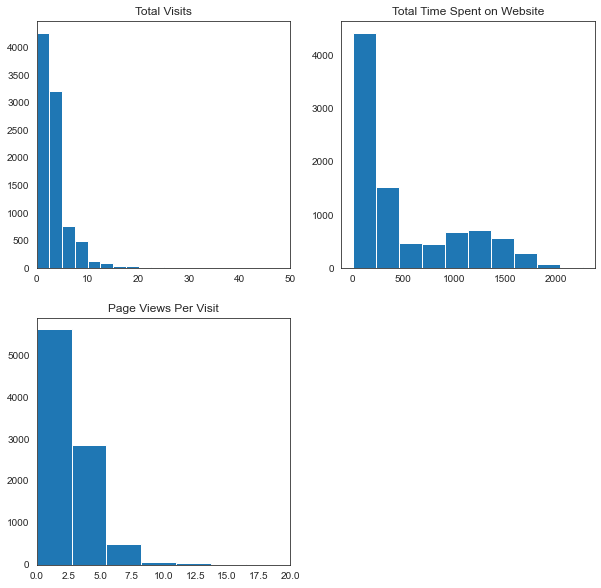

In [708]:
plt.figure(figsize = (10,10))

plt.subplot(2,2,1)
plt.hist(Lead_score['TotalVisits'], bins = 100)
plt.title('Total Visits')
plt.xlim(0,50)

plt.subplot(2,2,2)
plt.hist(Lead_score['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(2,2,3)
plt.hist(Lead_score['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()



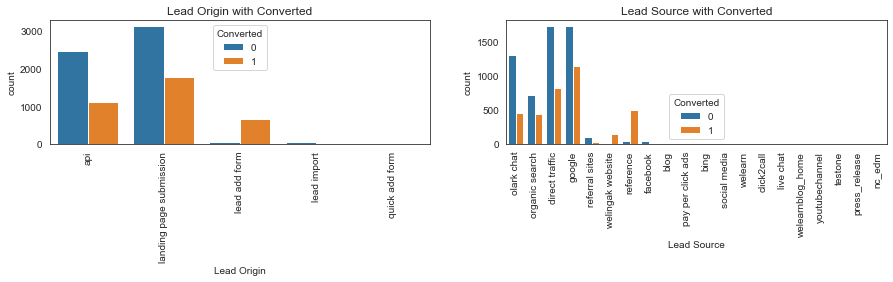

In [709]:
## Relating all categorical variables with converted

plt.figure(figsize = (15,5))

plt.subplot(2,2,1)
sns.countplot(Lead_score['Lead Origin'],hue = Lead_score["Converted"]).tick_params(axis='x', rotation = 90)
plt.title("Lead Origin with Converted")

plt.subplot(2,2,2)
sns.countplot(Lead_score['Lead Source'],hue = Lead_score["Converted"]).tick_params(axis='x', rotation = 90)
plt.title("Lead Source with Converted")

plt.show()




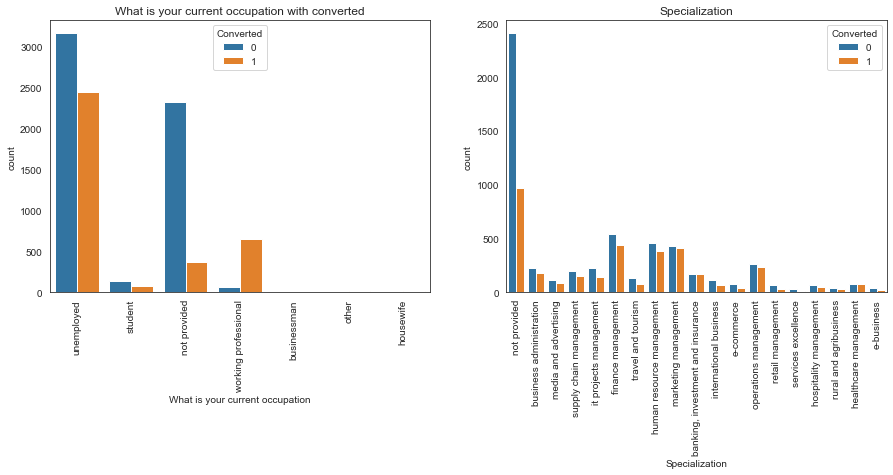

In [710]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.countplot(Lead_score['What is your current occupation'],hue = Lead_score["Converted"]).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation with converted')

plt.subplot(1,2,2)
sns.countplot(Lead_score['Specialization'],hue = Lead_score["Converted"]).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.show()

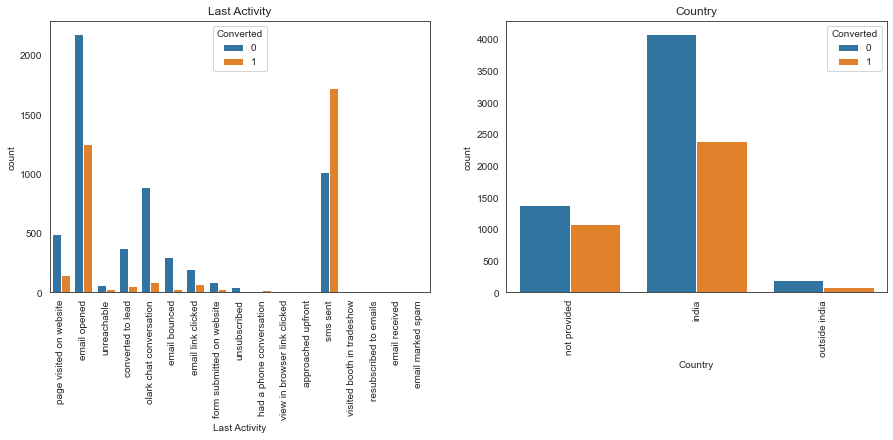

In [711]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= Lead_score).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= Lead_score).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()

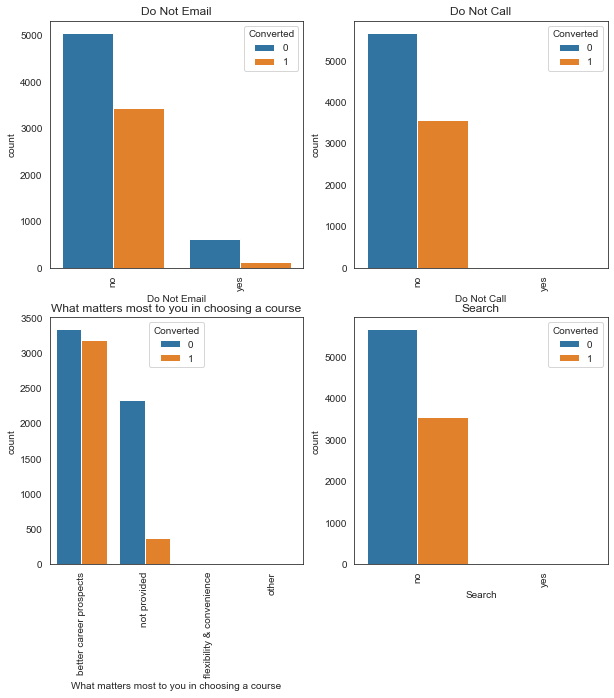

In [712]:
plt.figure(figsize = (10,10))

plt.subplot(2,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= Lead_score).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(2,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= Lead_score).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')

plt.subplot(2,2,3)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= Lead_score).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(2,2,4)
sns.countplot(x='Search', hue='Converted', data= Lead_score).tick_params(axis='x', rotation = 90)
plt.title('Search')

plt.show()

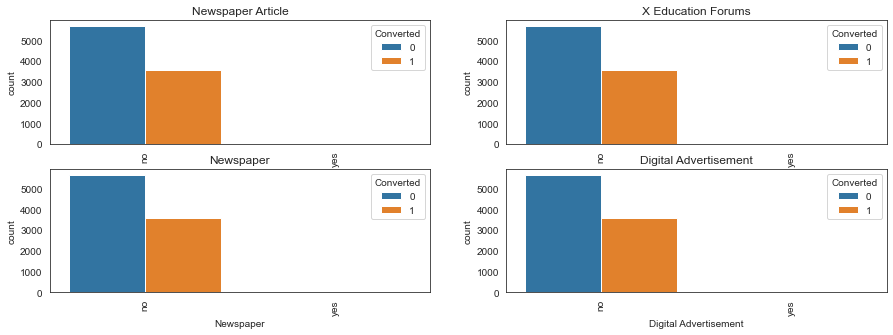

In [713]:
plt.figure(figsize = (15,5))

plt.subplot(2,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= Lead_score).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(2,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= Lead_score).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')

plt.subplot(2,2,3)
sns.countplot(x='Newspaper', hue='Converted', data= Lead_score).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(2,2,4)
sns.countplot(x='Digital Advertisement', hue='Converted', data= Lead_score).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')

plt.show()

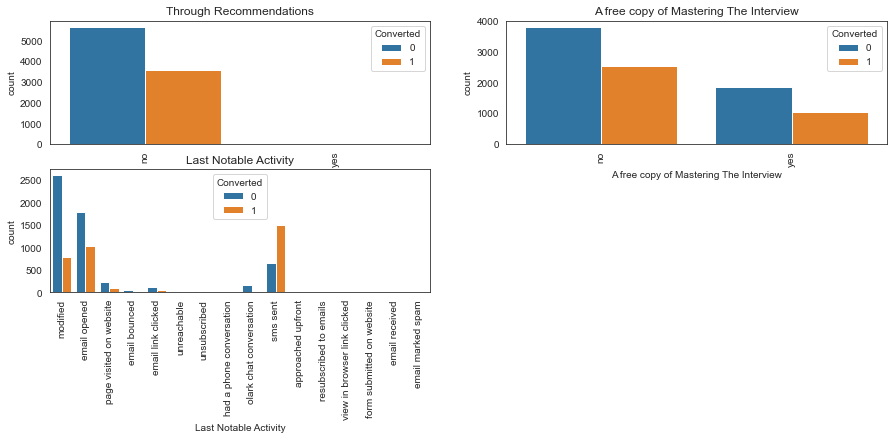

In [714]:
plt.figure(figsize = (15,5))

plt.subplot(2,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data = Lead_score).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(2,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= Lead_score).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')

plt.subplot(2,2,3)
sns.countplot(x='Last Notable Activity', hue='Converted', data= Lead_score).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')

plt.show()

<AxesSubplot:>

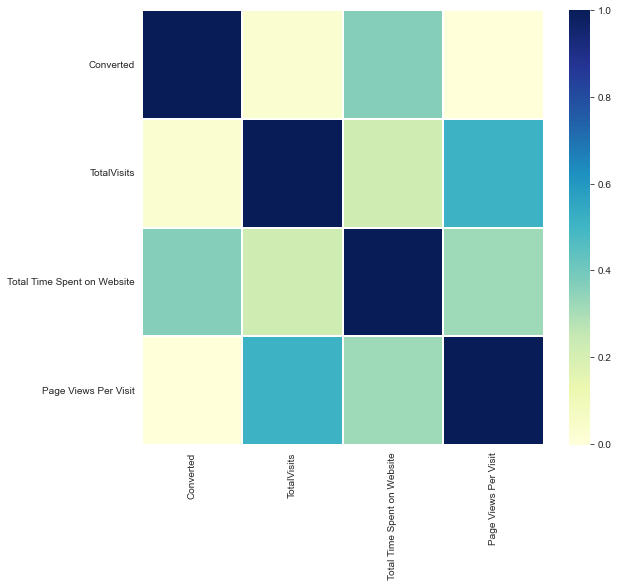

In [715]:
# Visualisi correlation among varibles
corr_mat = Lead_score.corr()
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corr_mat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

Total time spent on website are correlated with converted

### Outliers

In [716]:
numeric = Lead_score[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9240.000000,9103.000000
mean,3.445238,487.698268,2.362820
std,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
99%,17.000000,1840.610000,9.000000
max,251.000000,2272.000000,55.000000


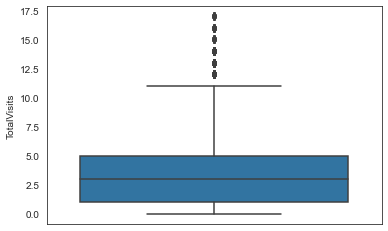

In [717]:
# For outlier treatment remove top and bottom 1% of the Totalvisits column

Q3 = Lead_score.TotalVisits.quantile(0.99)
Lead_score = Lead_score[(Lead_score.TotalVisits <= Q3)]
Q1 = Lead_score.TotalVisits.quantile(0.01)
Lead_score = Lead_score[(Lead_score.TotalVisits >= Q1)]
sns.boxplot(y=Lead_score['TotalVisits'])
plt.show()

### Dummy Variables

In [718]:
Lead_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9020 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9020 non-null   object 
 1   Lead Source                                    8991 non-null   object 
 2   Do Not Email                                   9020 non-null   object 
 3   Do Not Call                                    9020 non-null   object 
 4   Converted                                      9020 non-null   int64  
 5   TotalVisits                                    9020 non-null   float64
 6   Total Time Spent on Website                    9020 non-null   int64  
 7   Page Views Per Visit                           9020 non-null   float64
 8   Last Activity                                  9020 non-null   object 
 9   Country                                        9020 

In [719]:
# list of categorical columns

cat_cols= Lead_score.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [720]:
# Create dummy variables for the categorical variables using get_dummies 
dummy = pd.get_dummies(Lead_score[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
Lead_score_dummy = pd.concat([Lead_score, dummy], axis=1) # adding dummy columns to original dataframe
Lead_score_dummy

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,api,olark chat,no,no,0,0.0,0,0.00,page visited on website,not provided,...,0,0,1,0,0,0,0,0,0,0
1,api,organic search,no,no,0,5.0,674,2.50,email opened,india,...,0,0,0,0,0,0,0,0,0,0
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.00,email opened,india,...,0,0,0,0,0,0,0,0,0,0
3,landing page submission,direct traffic,no,no,0,1.0,305,1.00,unreachable,india,...,0,0,1,0,0,0,0,0,0,0
4,landing page submission,google,no,no,1,2.0,1428,1.00,converted to lead,india,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,landing page submission,direct traffic,yes,no,1,8.0,1845,2.67,email marked spam,outside india,...,0,0,0,0,0,0,0,0,0,0
9236,landing page submission,direct traffic,no,no,0,2.0,238,2.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0
9237,landing page submission,direct traffic,yes,no,0,2.0,199,2.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0
9238,landing page submission,google,no,no,1,3.0,499,3.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0


In [721]:
# droping the extra columns
Lead_score_dummy = Lead_score_dummy.drop(['What is your current occupation_not provided','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization', 'Specialization_not provided','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
Lead_score_dummy

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [722]:
Lead_score_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9020 entries, 0 to 9239
Data columns (total 81 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             9020 non-null   int64  
 1   TotalVisits                                           9020 non-null   float64
 2   Total Time Spent on Website                           9020 non-null   int64  
 3   Page Views Per Visit                                  9020 non-null   float64
 4   Lead Origin_landing page submission                   9020 non-null   uint8  
 5   Lead Origin_lead add form                             9020 non-null   uint8  
 6   Lead Origin_lead import                               9020 non-null   uint8  
 7   Specialization_business administration                9020 non-null   uint8  
 8   Specialization_e-business                             9020

In [723]:
Lead_score_dummy['Lead Source_google'].value_counts()

0    6165
1    2855
Name: Lead Source_google, dtype: int64

# 4. Splitting the Data into Training and Testing Sets
The first basic step for regression is performing a train-test split.

In [724]:
from sklearn.model_selection import train_test_split



In [725]:
# Putting feature variable to X
X = Lead_score_dummy.drop(['Converted'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [726]:
# Putting response variable to y
y = Lead_score_dummy['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [727]:
# Splitting the data into train and test into 70% and 30 % respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# 5. Feature Scaling

In [728]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
2873,0.235294,0.219263,0.250000,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6823,0.411765,0.790058,0.437500,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7258,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8327,0.470588,0.691522,0.166875,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
5940,0.058824,0.041722,0.062500,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [729]:
### Checking the Converted Rate
Convert = (sum(Lead_score_dummy['Converted'])/len(Lead_score_dummy['Converted'].index))*100
Convert

37.971175166297115

In [730]:
### we have almost 38% convertion rate

## 6. Looking at Correlations

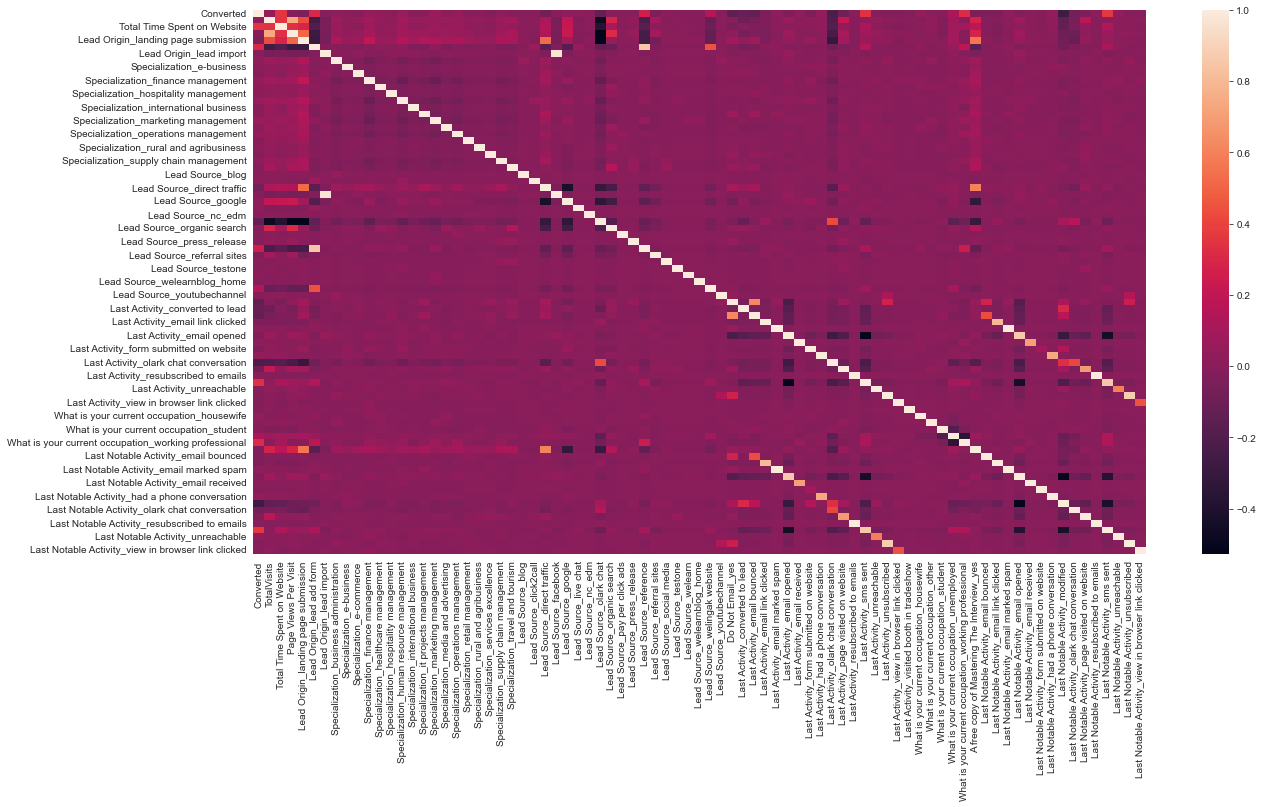

In [731]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(Lead_score_dummy.corr())
plt.show()

In [732]:
## Since there are lot of variables it is difficult to drop variables, lets do it after RFE

## 7. Model Building
Let's start by splitting our data into a training set and a test set.

#### Running Your First Training Model

In [733]:
import statsmodels.api as sm
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6241
Model Family:                Binomial   Df Model:                           72
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 18 Oct 2022   Deviance:                   1.3244e+05
Time:                        22:53:54   Pearson chi2:                 6.48e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 4.258e+15   4.54e+07   9.38e+07      0.000    4.26e+15    4.26e+15
TotalVisits                                          -6.865e+14   7.84e+06  -8.76e+07      0.000   -6.86e+14   -6.86e+14
Total Time Spent on Website                           3.487e+15   4.07e+06   8.56e+08      0.000    3.49e+15    3.49e+15
Page Views Per Visit                                  1.764e+14   1.12e+07   1.57e+07      0.000    1.76e+14    1.76e+14
Lead Origin_landing page submission                    9.89e+13   3.19e+06    3.1e+07      0.000    9.89e+13    9.89e+13
Lead Origin_lead add form                              1.67e+15   2.34e+07   7.13e+07      0.000    1.67e+15    1.67e+15
Lead Origin_lead import                                1.44e+15   4.94e+07   2.91e+07      0.000    1.44e+15    1.44e+15
Specialization_business administration                 5.13e+12   4.84e+06   1.06e+06      0.000    5.13e+12    5.13e+12
Specialization_e-business                             4.709e+14    1.1e+07   4.29e+07      0.000    4.71e+14    4.71e+14
Specialization_e-commerce                            -1.962e+14   8.27e+06  -2.37e+07      0.000   -1.96e+14   -1.96e+14
Specialization_finance management                    -7.091e+13   3.67e+06  -1.93e+07      0.000   -7.09e+13   -7.09e+13
Specialization_healthcare management                  2.077e+14      7e+06   2.97e+07      0.000    2.08e+14    2.08e+14
Specialization_hospitality management                 -4.61e+14   8.08e+06  -5.71e+07      0.000   -4.61e+14   -4.61e+14
Specialization_human resource management             -3.393e+13    3.8e+06  -8.92e+06      0.000   -3.39e+13   -3.39e+13
Specialization_international business                  4.72e+13   6.52e+06   7.24e+06      0.000    4.72e+13    4.72e+13
Specialization_it projects management                 2.238e+13   4.94e+06   4.53e+06      0.000    2.24e+13    2.24e+13
Specialization_marketing management                  -4.616e+13   3.73e+06  -1.24e+07      0.000   -4.62e+13   -4.62e+13
Specialization_media and advertising                   6.09e+13   6.31e+06   9.66e+06      0.000    6.09e+13    6.09e+13
Specialization_operations management                 -1.462e+14   4.44e+06  -3.29e+07      0.000   -1.46e+14   -1.46e+14
Specialization_retail management                     -8.011e+13   8.07e+06  -9.93e+06      0.000   -8.01e+13   -8.01e+13
Specialization_rural and agribusiness                -1.501e+14   9.44e+06  -1.59e+07      0.000    -1.5e+14    -1.5e+14
Specialization_services excellence                   -1.053e+14   1.26e+07  -8.36e+06      0.000   -1.05e+14   -1.05e+14
Specialization_supply chain management                7.55

### Feature Selection Using RFE

In [734]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [735]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [736]:
rfe.support_

array([ True,  True,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True, False,  True,  True, False,
       False, False, False, False, False,  True,  True, False, False,
        True, False, False, False, False,  True, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False])

In [737]:
# Features selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_landing page submission', False, 30),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 56),
 ('Specialization_business administration', False, 36),
 ('Specialization_e-business', False, 21),
 ('Specialization_e-commerce', False, 25),
 ('Specialization_finance management', False, 33),
 ('Specialization_healthcare management', False, 26),
 ('Specialization_hospitality management', False, 8),
 ('Specialization_human resource management', False, 35),
 ('Specialization_international business', False, 37),
 ('Specialization_it projects management', False, 29),
 ('Specialization_marketing management', False, 34),
 ('Specialization_media and advertising', False, 38),
 ('Specialization_operations management', False, 27),
 ('Specialization_retail management', False, 55),
 ('Specialization_rural and agribusiness', False, 20),
 ('Specialization_servic

In [738]:
col = X_train.columns[rfe.support_]

In [739]:
# Selecting columns selected by RFE
X_train = X_train[col]

##### Assessing the model with StatsModels

In [740]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6298
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2679.4
Date:                Tue, 18 Oct 2022   Deviance:                       5358.8
Time:                        22:53:57   Pearson chi2:                 6.77e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6669      0.076    -21.981      0.000      -1.816      -1.518
TotalVisits                                              1.2178      0.274      4.449      0.000       0.681       1.754
Total Time Spent on Website                              4.1880      0.154     27.271      0.000       3.887       4.489
Page Views Per Visit                                    -3.1809      0.399     -7.974      0.000      -3.963      -2.399
Lead Origin_lead add form                                3.3126      0.228     14.554      0.000       2.866       3.759
Lead Source_direct traffic                              -0.5800      0.079     -7.335      0.000      -0.735      -0.425
Lead Source_referral sites                              -0.3142      0.327     -0.960      0.337      -0.955       0.327
Lead Source_welingak website                             1.6734      0.751      2.228      0.026       0.202       3.145
Do Not Email_yes                                        -1.4350      0.165     -8.682      0.000      -1.759      -1.111
Last Activity_converted to lead                         -1.4696      0.218     -6.748      0.000      -1.896      -1.043
Last Activity_had a phone conversation                   1.9850      0.704      2.819      0.005       0.605       3.365
Last Activity_olark chat conversation                   -1.1695      0.156     -7.497      0.000      -1.475      -0.864
Last Activity_sms sent                                   1.3285      0.075     17.744      0.000       1.182       1.475
What is your current occupation_housewife               22.8889    1.6e+04      0.001      0.999   -3.14e+04    3.14e+04
What is your current occupation_working professional     2.7348      0.188     14.529      0.000       2.366       3.104
Last Notable Activity_unreachable                        1.5635      0.525      2.980      0.003       0.535       2.592
========================================================================================================================
"""

In [741]:
# Importing the variance_inflation_factor from statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [742]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,5.07
0,TotalVisits,4.77
1,Total Time Spent on Website,2.04
11,Last Activity_sms sent,1.49
3,Lead Origin_lead add form,1.47
4,Lead Source_direct traffic,1.41
6,Lead Source_welingak website,1.31
13,What is your current occupation_working profes...,1.16
7,Do Not Email_yes,1.08
8,Last Activity_converted to lead,1.05


Page Views Per Visit is having high VIF value of 5.07 

In [743]:
# As Page Views Per Visit is having high VIF values, we can drop it

X_train.drop('Page Views Per Visit', axis = 1, inplace = True)

In [744]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6299
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2712.5
Date:                Tue, 18 Oct 2022   Deviance:                       5425.1
Time:                        22:53:57   Pearson chi2:                 6.67e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8107      0.074    -24.307      0.000      -1.957      -1.665
TotalVisits                                             -0.2328      0.211     -1.105      0.269      -0.646       0.180
Total Time Spent on Website                              4.0202      0.150     26.806      0.000       3.726       4.314
Lead Origin_lead add form                                3.4787      0.227     15.351      0.000       3.035       3.923
Lead Source_direct traffic                              -0.5823      0.078     -7.443      0.000      -0.736      -0.429
Lead Source_referral sites                              -0.3981      0.327     -1.219      0.223      -1.038       0.242
Lead Source_welingak website                             1.6739      0.750      2.231      0.026       0.203       3.145
Do Not Email_yes                                        -1.4456      0.164     -8.811      0.000      -1.767      -1.124
Last Activity_converted to lead                         -1.4486      0.217     -6.682      0.000      -1.873      -1.024
Last Activity_had a phone conversation                   2.0371      0.715      2.849      0.004       0.636       3.438
Last Activity_olark chat conversation                   -1.0723      0.155     -6.906      0.000      -1.377      -0.768
Last Activity_sms sent                                   1.2523      0.073     17.064      0.000       1.108       1.396
What is your current occupation_housewife               22.8775   1.59e+04      0.001      0.999   -3.12e+04    3.12e+04
What is your current occupation_working professional     2.6883      0.187     14.380      0.000       2.322       3.055
Last Notable Activity_unreachable                        1.5277      0.530      2.883      0.004       0.489       2.566
========================================================================================================================
"""

In [745]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Total Time Spent on Website,1.99
0,TotalVisits,1.98
2,Lead Origin_lead add form,1.46
10,Last Activity_sms sent,1.45
3,Lead Source_direct traffic,1.40
5,Lead Source_welingak website,1.31
12,What is your current occupation_working profes...,1.16
6,Do Not Email_yes,1.08
7,Last Activity_converted to lead,1.04
4,Lead Source_referral sites,1.03


VIF values are good but What is your current occupation_housewife variable is having high p-value of 0.999


In [746]:
# As 'What is your current occupation_housewife' is having high p-values, we can drop it

X_train.drop('What is your current occupation_housewife', axis = 1, inplace = True)

In [747]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6300
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2718.2
Date:                Tue, 18 Oct 2022   Deviance:                       5436.4
Time:                        22:53:57   Pearson chi2:                 6.69e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8019      0.074    -24.244      0.000      -1.948      -1.656
TotalVisits                                             -0.2410      0.210     -1.145      0.252      -0.654       0.171
Total Time Spent on Website                              4.0197      0.150     26.812      0.000       3.726       4.314
Lead Origin_lead add form                                3.4941      0.226     15.441      0.000       3.051       3.938
Lead Source_direct traffic                              -0.5826      0.078     -7.455      0.000      -0.736      -0.429
Lead Source_referral sites                              -0.4017      0.327     -1.230      0.219      -1.042       0.238
Lead Source_welingak website                             1.6533      0.750      2.203      0.028       0.183       3.124
Do Not Email_yes                                        -1.4501      0.164     -8.837      0.000      -1.772      -1.128
Last Activity_converted to lead                         -1.4556      0.217     -6.716      0.000      -1.880      -1.031
Last Activity_had a phone conversation                   2.0308      0.715      2.840      0.005       0.629       3.432
Last Activity_olark chat conversation                   -1.0797      0.155     -6.956      0.000      -1.384      -0.775
Last Activity_sms sent                                   1.2455      0.073     16.986      0.000       1.102       1.389
What is your current occupation_working professional     2.6840      0.187     14.357      0.000       2.318       3.050
Last Notable Activity_unreachable                        1.5214      0.530      2.871      0.004       0.483       2.560
========================================================================================================================
"""

In [748]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Total Time Spent on Website,1.99
0,TotalVisits,1.98
2,Lead Origin_lead add form,1.46
10,Last Activity_sms sent,1.45
3,Lead Source_direct traffic,1.40
5,Lead Source_welingak website,1.31
11,What is your current occupation_working profes...,1.16
6,Do Not Email_yes,1.08
7,Last Activity_converted to lead,1.04
4,Lead Source_referral sites,1.03


VIF values are good but 'Lead Source_referral sites' variable is having high p-value of 0.219


In [749]:
# As 'Lead Source_referral sites' is having high p-value, we can drop it
X_train.drop('Lead Source_referral sites', axis = 1, inplace = True)

In [750]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6301
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2719.0
Date:                Tue, 18 Oct 2022   Deviance:                       5438.0
Time:                        22:53:57   Pearson chi2:                 6.69e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8059      0.074    -24.313      0.000      -1.952      -1.660
TotalVisits                                             -0.2618      0.210     -1.248      0.212      -0.673       0.149
Total Time Spent on Website                              4.0229      0.150     26.841      0.000       3.729       4.317
Lead Origin_lead add form                                3.4972      0.226     15.454      0.000       3.054       3.941
Lead Source_direct traffic                              -0.5762      0.078     -7.388      0.000      -0.729      -0.423
Lead Source_welingak website                             1.6530      0.750      2.203      0.028       0.182       3.124
Do Not Email_yes                                        -1.4502      0.164     -8.838      0.000      -1.772      -1.129
Last Activity_converted to lead                         -1.4565      0.217     -6.724      0.000      -1.881      -1.032
Last Activity_had a phone conversation                   2.0398      0.715      2.852      0.004       0.638       3.442
Last Activity_olark chat conversation                   -1.0850      0.155     -6.986      0.000      -1.389      -0.781
Last Activity_sms sent                                   1.2497      0.073     17.059      0.000       1.106       1.393
What is your current occupation_working professional     2.6826      0.187     14.346      0.000       2.316       3.049
Last Notable Activity_unreachable                        1.5021      0.529      2.841      0.004       0.466       2.538
========================================================================================================================
"""

In [751]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2873    0.845154
6823    0.925136
7258    0.052602
8327    0.442189
5940    0.024603
5686    0.887942
5372    0.789352
4736    0.185538
5812    0.987553
893     0.348509
dtype: float64

In [752]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.84515395, 0.92513625, 0.0526016 , 0.44218899, 0.02460312,
       0.88794239, 0.78935155, 0.18553834, 0.98755341, 0.34850869])

In [753]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.845154
1,1,0.925136
2,0,0.052602
3,1,0.442189
4,0,0.024603


In [754]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.845154,1
1,1,0.925136,1
2,0,0.052602,0
3,1,0.442189,0
4,0,0.024603,0


# 8. Model Evaluation

In [755]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion    

array([[3508,  429],
       [ 827, 1550]], dtype=int64)

In [756]:
# Predicted     not_churn    churn
# Actual
# not_churn        3508       429
# churn             827      1550

In [757]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8010769718086791

In [758]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [759]:
# Calculating the sensitivity
TP/(TP+FN)

0.6520824568784181

In [760]:
# Calculating the specificity
TN/(TN+FP)

0.8910337820675641

## Optimise Cut off (ROC Curve)
##### The previous cut off was randomely selected. Now to find the optimum one

In [761]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [762]:

fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )


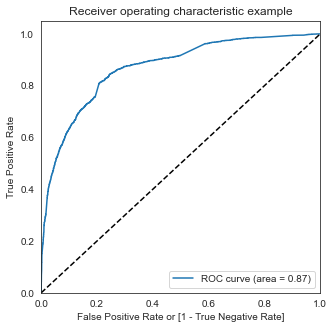

In [763]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [764]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.845154,1,1,1,1,1,1,1,1,1,1,0
1,1,0.925136,1,1,1,1,1,1,1,1,1,1,1
2,0,0.052602,0,1,0,0,0,0,0,0,0,0,0
3,1,0.442189,0,1,1,1,1,1,0,0,0,0,0
4,0,0.024603,0,1,0,0,0,0,0,0,0,0,0


In [765]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.376465,1.000000,0.000000
0.1,0.1,0.565252,0.977282,0.316485
0.2,0.2,0.736300,0.886411,0.645669
0.3,0.3,0.788090,0.845183,0.753620
0.4,0.4,0.795375,0.731174,0.834138
0.5,0.5,0.801077,0.652082,0.891034
0.6,0.6,0.792841,0.569205,0.927864
0.7,0.7,0.779379,0.493479,0.951994
0.8,0.8,0.759424,0.404291,0.973838
0.9,0.9,0.705733,0.234329,0.990348


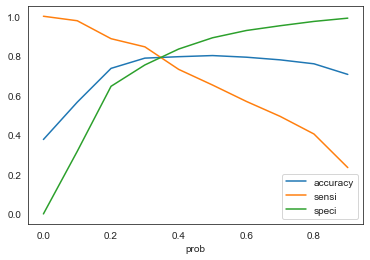

In [766]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [767]:
# From the above line plot we can see that optimal cutoff is 3.5

In [768]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.845154,1,1,1,1,1,1,1,1,1,1,0,1
1,1,0.925136,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.052602,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.442189,0,1,1,1,1,1,0,0,0,0,0,1
4,0,0.024603,0,1,0,0,0,0,0,0,0,0,0,0


In [769]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7952169781438074

In [770]:
# Creating confusion matrix 
confusion_mat2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion_mat2

array([[3078,  859],
       [ 434, 1943]], dtype=int64)

In [771]:
# Substituting the value of true positive
TP = confusion_mat2[1,1]
# Substituting the value of true negatives
TN = confusion_mat2[0,0]
# Substituting the value of false positives
FP = confusion_mat2[0,1] 
# Substituting the value of false negatives
FN = confusion_mat2[1,0]

In [772]:
# Calculating the sensitivity
TP/(TP+FN)

0.8174169120740429

In [773]:
# Calculating the specificity
TN/(TN+FP)

0.7818135636271273

In [774]:
### With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 80%

## Prediction on Test set

In [775]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])


In [776]:
# Substituting all the columns in the final train model
col = X_train.columns

In [777]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_lead add form,Lead Source_direct traffic,Lead Source_welingak website,Do Not Email_yes,Last Activity_converted to lead,Last Activity_had a phone conversation,Last Activity_olark chat conversation,Last Activity_sms sent,What is your current occupation_working professional,Last Notable Activity_unreachable
5130,1.0,0.000000,0.000000,0,0,0,1,0,0,0,0,0,0
6929,1.0,0.294118,0.012872,0,0,0,0,0,0,0,0,0,0
1484,1.0,0.235294,0.055482,0,0,0,1,0,0,0,1,0,0
6519,1.0,0.117647,0.701731,0,0,0,0,0,0,0,1,0,0
7472,1.0,0.117647,0.615180,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1814,1.0,0.176471,0.336884,0,0,0,0,0,0,0,0,0,0
1962,1.0,0.294118,0.075011,0,0,0,0,0,0,0,1,0,0
3882,1.0,0.411765,0.113182,0,1,0,0,0,0,0,0,0,0
8451,1.0,0.470588,0.713271,0,0,0,0,0,0,0,1,0,0


In [778]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.037106
1,0,0.138101
2,0,0.136478
3,0,0.903432
4,1,0.787768


In [779]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.037106,0
1,0,0.138101,0
2,0,0.136478,0
3,0,0.903432,1
4,1,0.787768,1
...,...,...,...
2701,0,0.378270,1
2702,0,0.417885,1
2703,0,0.115611,0
2704,1,0.899345,1


In [780]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7912047302291205

In [781]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1299,  359],
       [ 206,  842]], dtype=int64)

In [782]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [783]:
# Calculating the sensitivity
TP/(TP+FN)

0.8034351145038168

In [784]:
# Calculating the specificity
TN/(TN+FP)

0.7834740651387213

In [785]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7952169781438074

In [786]:
# with cutoff as 0.35 we have accuracy, sensitivity and specificity on test results are 80% 

### Precision-Recall

In [787]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3508,  429],
       [ 827, 1550]], dtype=int64)

In [788]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7832238504295098

In [789]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6520824568784181

In [790]:
# Precision and recall are 0.78 and 0.65 respectively.

#### Precision and recall tradeoff

In [791]:
from sklearn.metrics import precision_recall_curve

In [792]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       1
 2       0
 3       1
 4       0
        ..
 6309    0
 6310    1
 6311    0
 6312    1
 6313    1
 Name: Converted, Length: 6314, dtype: int64,
 0       1
 1       1
 2       0
 3       0
 4       0
        ..
 6309    0
 6310    1
 6311    0
 6312    0
 6313    1
 Name: Predicted, Length: 6314, dtype: int64)

In [793]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

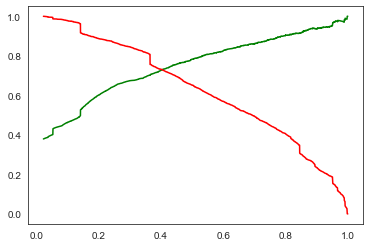

In [794]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [795]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.40 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.845154,1,1,1,1,1,1,1,1,1,1,0,1
1,1,0.925136,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.052602,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.442189,0,1,1,1,1,1,0,0,0,0,0,1
4,0,0.024603,0,1,0,0,0,0,0,0,0,0,0,0


In [796]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7953753563509661

In [797]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3284,  653],
       [ 639, 1738]], dtype=int64)

In [798]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [799]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7268925135926391

In [800]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7311737484223811

In [801]:
# Precision and recall are 73% with accuracy of 79% when cutoff is 0.40 for train set

#### Prediction on Test set

In [802]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.037106
1,0,0.138101
2,0,0.136478
3,0,0.903432
4,1,0.787768


In [803]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.40 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.037106,0
1,0,0.138101,0
2,0,0.136478,0
3,0,0.903432,1
4,1,0.787768,1
...,...,...,...
2701,0,0.378270,0
2702,0,0.417885,1
2703,0,0.115611,0
2704,1,0.899345,1


In [804]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7875092387287509

In [805]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1382,  276],
       [ 299,  749]], dtype=int64)

In [806]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [807]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7307317073170732

In [808]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7146946564885496

In [809]:
# Precision and recall are 73% with accuracy of 79% when cutoff is 0.40 for test set

# Conclusion

The major contributing variables are:

1.The total time spend on the Website.

2.Total number of visits.

3.When the lead source was google, direct traffic and organic search.

4.When the last activity was SMS and Olark chat conversation.

5.When their current occupation is unemployed.

6.And it is better to send emails and sms to the customers rather than direct calls.